In [1]:
#%matplotlib notebook
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 10)

import numpy as np
#np.set_printoptions(threshold=np.nan)
from matplotlib import pyplot as plt
from matplotlib import cm

import ctapipe
from ctapipe.io.hessio import hessio_event_source
import pyhessio

import sys
sys.path.append("../")

import datapipe
import datapipe.denoising.wavelets_mrfilter as mrfilter

sys.path.append("../utils")
import common_functions as common

from datapipe.io import images
from datapipe.io import geometry_converter

In [2]:
#ctapipe.version.get_version()
print(ctapipe.__version__)
print(pyhessio.__version__)

import ctapipe.image.geometry_converter as geomconv
from ctapipe.instrument import CameraGeometry

0.5.1
2.0.1


In [3]:
# calibrator
from ctapipe.calib import CameraCalibrator

calib = CameraCalibrator(None, None)

## ASTRI mini array

In [ ]:
%run ~/git/pub/jdhp-sap/snippets/ctapipe/list_telescopes_geometry.py ~/data/astri_mini_array/gamma/run1001.simtel.gz

### ASTRI

ASTRI = "ASTRICam" (tel 1 to 33 in astri mini array), 2 channels

In [4]:
#tel_id_filter_list = list(range(1, 34))
tel_id_filter_list = [1]
print("Tel ID range:", tel_id_filter_list)

source = hessio_event_source("/Users/jdecock/data/astri_mini_array/gamma/run1001.simtel.gz",
                             allowed_tels=tel_id_filter_list)

# ITERATE OVER EVENTS #############################################

pe_list = []
calibrated_in_ch0_list = []
calibrated_in_ch1_list = []

for ev in source:
    calib.calibrate(ev)  # calibrate the event
    
    #print(ev)
    
    # ITERATE OVER IMAGES #########################################

    for tel_id in ev.trig.tels_with_trigger:

        tel_id = int(tel_id)

        if tel_id in tel_id_filter_list:

            pe = ev.mc.tel[tel_id].photo_electron_image
            #pedestal = ev.mc.tel[tel_id].pedestal[channel]
            #gain = ev.mc.tel[tel_id].dc_to_pe[channel]
            #uncalibrated_image = ev.r0.tel[tel_id].adc_sums[channel]
            calibrated_image = ev.dl1.tel[tel_id].image
            
            pe_list.append(pe)
            calibrated_in_ch0_list.append(calibrated_image[0])
            calibrated_in_ch1_list.append(calibrated_image[1])

pe_array = np.array(pe_list).ravel()
calibrated_in_ch0_array = np.array(calibrated_in_ch0_list).ravel()
calibrated_in_ch1_array = np.array(calibrated_in_ch1_list).ravel()

print("ch0 max:", calibrated_in_ch0_array.max())
print("num samples:", len(pe_array))

Tel ID range: [1]
ch0 max: 18.1537333263
num samples: 1124800


In [9]:
astri_channel_threshold = 15   # FYI Tino uses 14

(-3, 40)

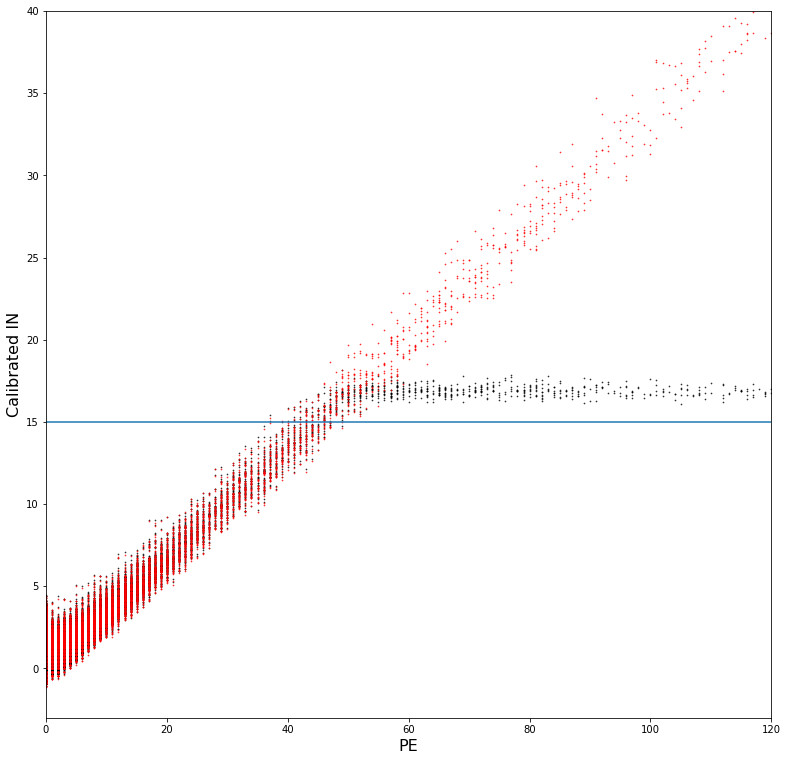

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

ax.scatter(pe_array,
           calibrated_in_ch0_array,
           s=0.5,         # radius
           c="black",     # color
           alpha=0.75,
           label="channel 0")

ax.scatter(pe_array,
           calibrated_in_ch1_array,
           s=0.5,         # radius
           c="red",     # color
           alpha=0.75,
           label="channel 1")

ax.axhline(astri_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Calibrated IN", fontsize=16)

ax.set_xlim(0, 120)
ax.set_ylim(-3, 40)

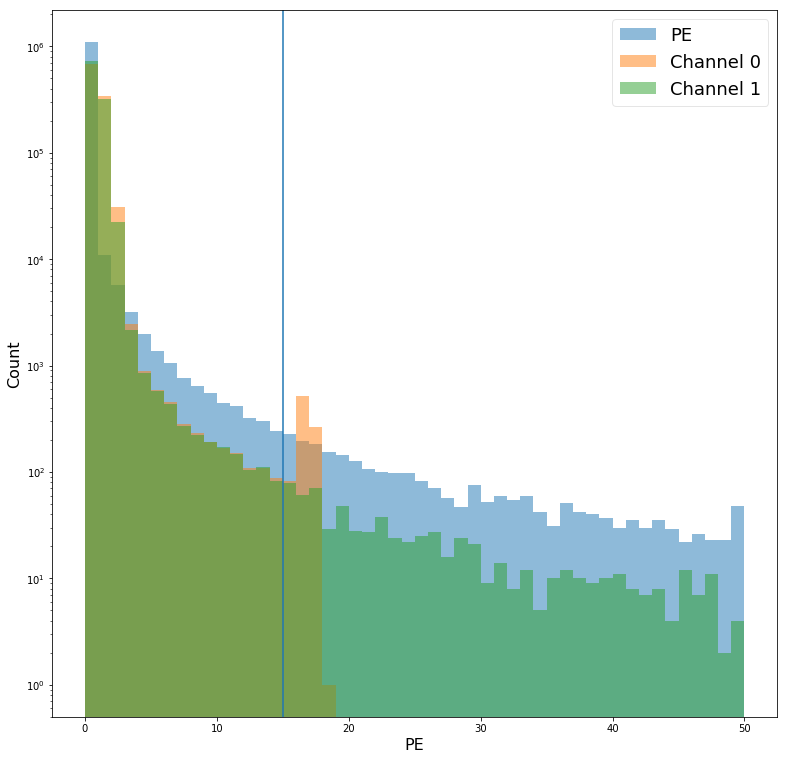

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

bin_max = 50
num_bins = bin_max

ax.hist(pe_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="PE")

ax.hist(calibrated_in_ch0_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 0")

ax.hist(calibrated_in_ch1_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 1")

ax.axvline(astri_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax.legend(prop={'size': 18}, loc='best', fancybox=True, framealpha=0.5)

## Prod3

In [ ]:
%run ~/git/pub/jdhp-sap/snippets/ctapipe/list_telescopes_geometry.py ~/vm-shared/data/prod3/full_telarray_example.simtel.gz

### ASTRI

ASTRI = "ASTRICam" (tel 29 to 52 in prod3), 2 channels

In [18]:
tel_id_filter_list = list(range(29, 53))
print("Tel ID range:", tel_id_filter_list)

source = hessio_event_source("/Users/jdecock/vm-shared/data/prod3/full_telarray_example.simtel.gz",
                             allowed_tels=tel_id_filter_list)

# ITERATE OVER EVENTS #############################################

pe_list = []
calibrated_in_ch0_list = []
calibrated_in_ch1_list = []

for ev in source:
    calib.calibrate(ev)  # calibrate the event
    
    #print(ev)
    
    # ITERATE OVER IMAGES #########################################

    for tel_id in ev.trig.tels_with_trigger:

        tel_id = int(tel_id)

        if tel_id in tel_id_filter_list:

            pe = ev.mc.tel[tel_id].photo_electron_image
            #pedestal = ev.mc.tel[tel_id].pedestal[channel]
            #gain = ev.mc.tel[tel_id].dc_to_pe[channel]
            #uncalibrated_image = ev.r0.tel[tel_id].adc_sums[channel]
            calibrated_image = ev.dl1.tel[tel_id].image
            
            pe_list.append(pe)
            calibrated_in_ch0_list.append(calibrated_image[0])
            calibrated_in_ch1_list.append(calibrated_image[1])

pe_array = np.array(pe_list).ravel()
calibrated_in_ch0_array = np.array(calibrated_in_ch0_list).ravel()
calibrated_in_ch1_array = np.array(calibrated_in_ch1_list).ravel()

print("ch0 max:", calibrated_in_ch0_array.max())
print("num samples:", len(pe_array))

Tel ID range: [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
ch0 max: 22.8131050895
num samples: 449920


In [19]:
astri_prod3_channel_threshold = 20

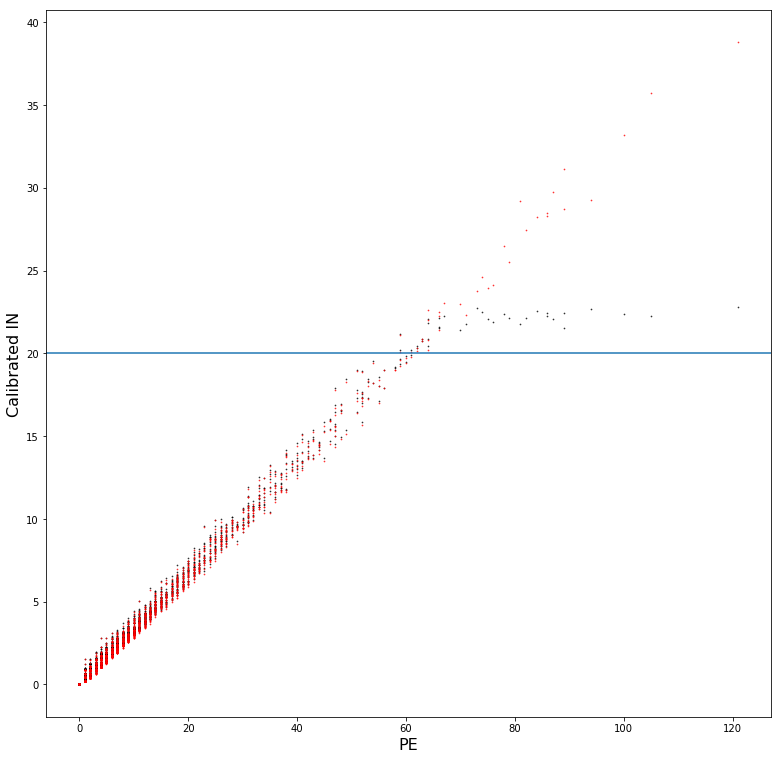

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

ax.scatter(pe_array,
           calibrated_in_ch0_array,
           s=0.5,         # radius
           c="black",     # color
           alpha=0.75,
           label="channel 0")

ax.scatter(pe_array,
           calibrated_in_ch1_array,
           s=0.5,         # radius
           c="red",     # color
           alpha=0.75,
           label="channel 1")

ax.axhline(astri_prod3_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Calibrated IN", fontsize=16)

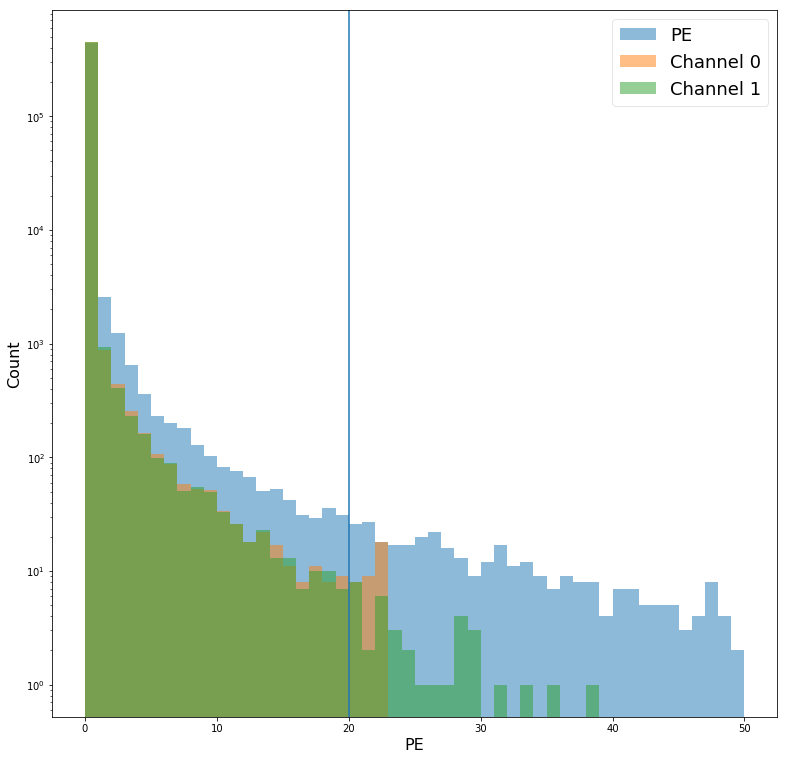

In [21]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

bin_max = 50
num_bins = bin_max

ax.hist(pe_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="PE")

ax.hist(calibrated_in_ch0_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 0")

ax.hist(calibrated_in_ch1_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 1")

ax.axvline(astri_prod3_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax.legend(prop={'size': 18}, loc='best', fancybox=True, framealpha=0.5)

### LSTCam

Dragoncam = "LSTCam" (tel 1 to 4 in prod3), 2 channels

In [22]:
tel_id_filter_list = list(range(1, 5))
print("Tel ID range:", tel_id_filter_list)

source = hessio_event_source("/Users/jdecock/vm-shared/data/prod3/full_telarray_example.simtel.gz",
                             allowed_tels=tel_id_filter_list)

# ITERATE OVER EVENTS #############################################

pe_list = []
calibrated_in_ch0_list = []
calibrated_in_ch1_list = []

for ev in source:
    calib.calibrate(ev)  # calibrate the event
    
    #print(ev)
    
    # ITERATE OVER IMAGES #########################################

    for tel_id in ev.trig.tels_with_trigger:

        tel_id = int(tel_id)

        if tel_id in tel_id_filter_list:

            pe = ev.mc.tel[tel_id].photo_electron_image
            #pedestal = ev.mc.tel[tel_id].pedestal[channel]
            #gain = ev.mc.tel[tel_id].dc_to_pe[channel]
            #uncalibrated_image = ev.r0.tel[tel_id].adc_sums[channel]
            calibrated_image = ev.dl1.tel[tel_id].image
            
            pe_list.append(pe)
            calibrated_in_ch0_list.append(calibrated_image[0])
            calibrated_in_ch1_list.append(calibrated_image[1])

pe_array = np.array(pe_list).ravel()
calibrated_in_ch0_array = np.array(calibrated_in_ch0_list).ravel()
calibrated_in_ch1_array = np.array(calibrated_in_ch1_list).ravel()

print("ch0 max:", calibrated_in_ch0_array.max())
print("num samples:", len(pe_array))

Tel ID range: [1, 2, 3, 4]
ch0 max: 215.690475297
num samples: 155820


In [36]:
lstcam_channel_threshold = 110

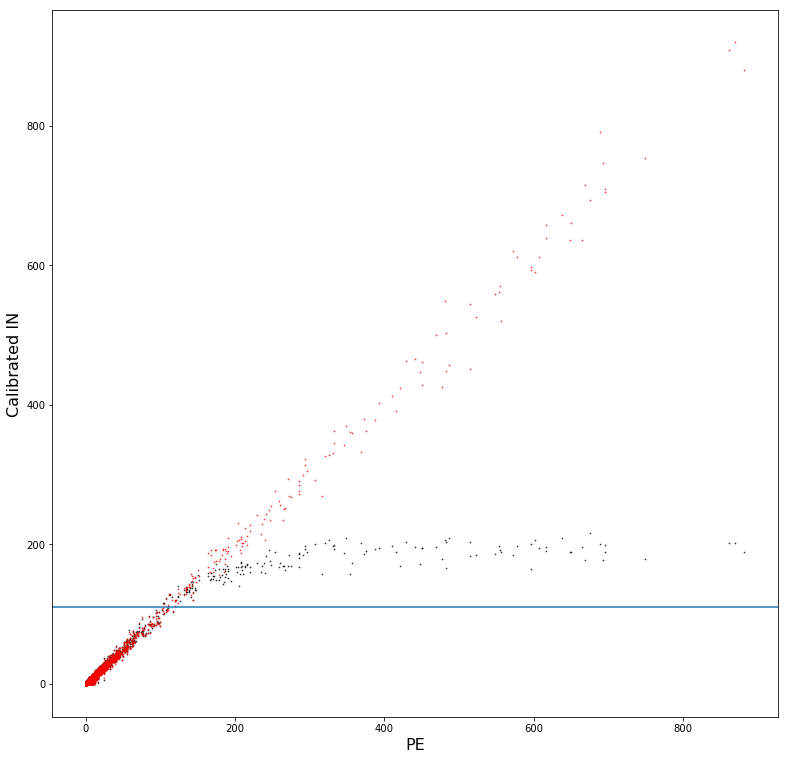

In [37]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

ax.scatter(pe_array,
           calibrated_in_ch0_array,
           s=0.5,         # radius
           c="black",     # color
           alpha=0.75,
           label="channel 0")

ax.scatter(pe_array,
           calibrated_in_ch1_array,
           s=0.5,         # radius
           c="red",     # color
           alpha=0.75,
           label="channel 1")

ax.axhline(lstcam_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Calibrated IN", fontsize=16)

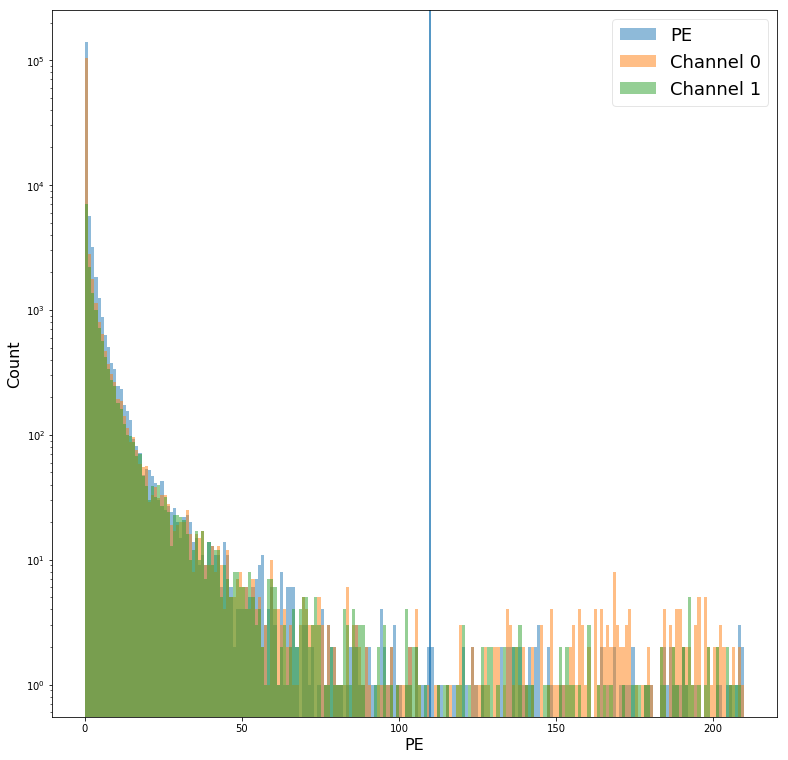

In [41]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

bin_max = lstcam_channel_threshold + 100
num_bins = bin_max

ax.hist(pe_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="PE")

ax.hist(calibrated_in_ch0_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 0")

ax.hist(calibrated_in_ch1_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 1")

ax.axvline(lstcam_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax.legend(prop={'size': 18}, loc='best', fancybox=True, framealpha=0.5)

### NectarCam

Nectarcam = "NectarCam" (tel 5 to 16 in prod3), 2 channels

In [42]:
tel_id_filter_list = list(range(5, 17))
print("Tel ID range:", tel_id_filter_list)

source = hessio_event_source("/Users/jdecock/vm-shared/data/prod3/full_telarray_example.simtel.gz",
                             allowed_tels=tel_id_filter_list)

# ITERATE OVER EVENTS #############################################

pe_list = []
calibrated_in_ch0_list = []
calibrated_in_ch1_list = []

for ev in source:
    calib.calibrate(ev)  # calibrate the event
    
    #print(ev)
    
    # ITERATE OVER IMAGES #########################################

    for tel_id in ev.trig.tels_with_trigger:

        tel_id = int(tel_id)

        if tel_id in tel_id_filter_list:

            pe = ev.mc.tel[tel_id].photo_electron_image
            #pedestal = ev.mc.tel[tel_id].pedestal[channel]
            #gain = ev.mc.tel[tel_id].dc_to_pe[channel]
            #uncalibrated_image = ev.r0.tel[tel_id].adc_sums[channel]
            calibrated_image = ev.dl1.tel[tel_id].image
            
            pe_list.append(pe)
            calibrated_in_ch0_list.append(calibrated_image[0])
            calibrated_in_ch1_list.append(calibrated_image[1])

pe_array = np.array(pe_list).ravel()
calibrated_in_ch0_array = np.array(calibrated_in_ch0_list).ravel()
calibrated_in_ch1_array = np.array(calibrated_in_ch1_list).ravel()

print("ch0 max:", calibrated_in_ch0_array.max())
print("num samples:", len(pe_array))

Tel ID range: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ch0 max: 377.532679357
num samples: 549080


In [46]:
nectarcam_channel_threshold = 190

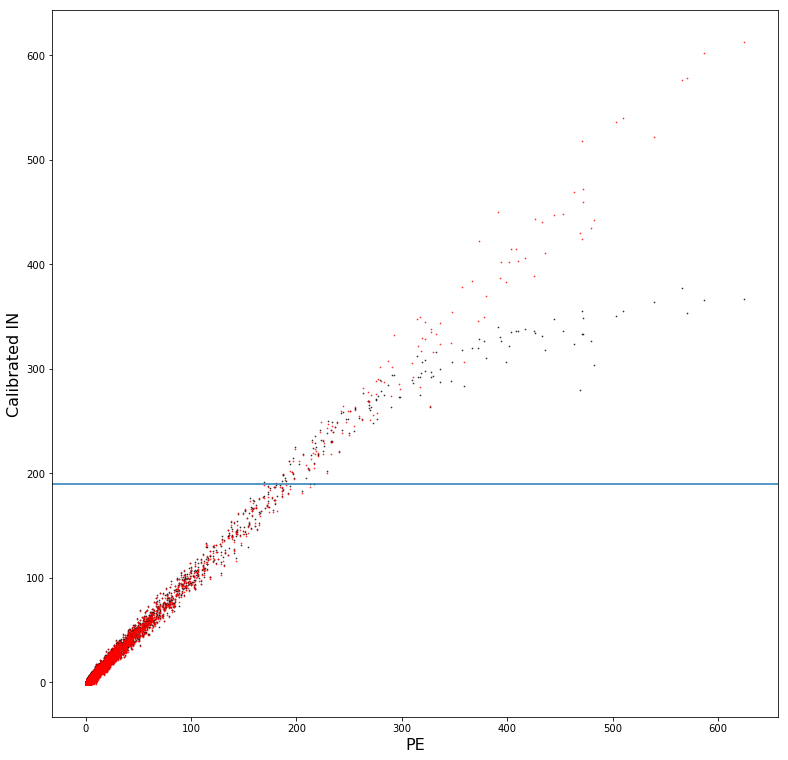

In [47]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

ax.scatter(pe_array,
           calibrated_in_ch0_array,
           s=0.5,         # radius
           c="black",     # color
           alpha=0.75,
           label="channel 0")

ax.scatter(pe_array,
           calibrated_in_ch1_array,
           s=0.5,         # radius
           c="red",     # color
           alpha=0.75,
           label="channel 1")

ax.axhline(nectarcam_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Calibrated IN", fontsize=16)

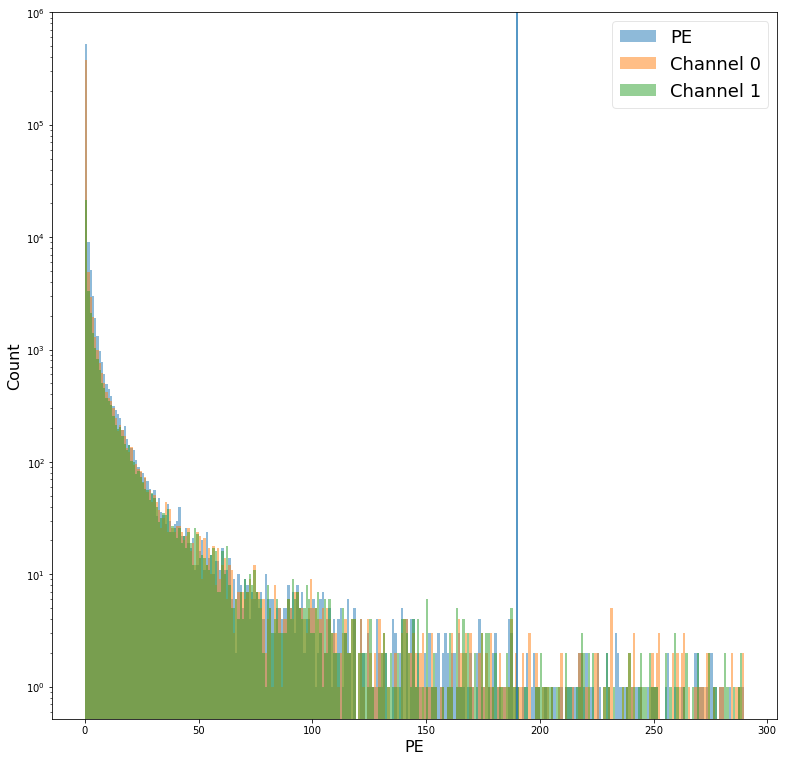

In [48]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 13))

bin_max = nectarcam_channel_threshold + 100
num_bins = bin_max

ax.hist(pe_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="PE")

ax.hist(calibrated_in_ch0_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 0")

ax.hist(calibrated_in_ch1_array,
        alpha=0.5,
        log=True,
        bins=num_bins,
        range=(0, bin_max),
        label="Channel 1")

ax.axvline(nectarcam_channel_threshold)

ax.set_xlabel("PE", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax.legend(prop={'size': 18}, loc='best', fancybox=True, framealpha=0.5)

## Channel mix snippet

In [49]:
img = np.array([[  1,   2,   3,   4, 5, 6, 6, 6, 6],
                [1.5, 2.5, 3.5, 4.5, 5, 6, 7, 8, 9]])

threshold = 5

img[1, img[0,:] <= threshold] = 0
img[0, img[0,:] >  threshold] = 0

#img[0, img[0,:] >  threshold] = 0
#img[1, img[1,:] <= threshold] = 0

print(img)

img = img.sum(axis=0)

print(img)

[[ 1.  2.  3.  4.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  7.  8.  9.]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
